#Setup (Libraries and data import)

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from google.colab import drive
import plotly.express as px
import seaborn as sns
cmap = sns.color_palette()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.getcwd()
path = '/content/drive/My Drive/Python/Kaggle/g-research-crypto-forecasting'
os.chdir(path)

In [8]:
train = pd.read_csv('train.csv')

#Data Visualization

In [10]:
train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [13]:
assets = pd.read_csv('asset_details.csv')
assets.sort_values('Weight', ascending = False)

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum
10,3,4.406719,Cardano
1,0,4.304065,Binance Coin
13,4,3.555348,Dogecoin
0,2,2.397895,Bitcoin Cash
6,9,2.397895,Litecoin
4,7,2.079442,Ethereum Classic
9,12,2.079442,Stellar
8,13,1.791759,TRON


##Data Distribution

In [15]:
train['asset_name'] = train.Asset_ID.map(assets.set_index('Asset_ID').Asset_Name)
print(f'There are {len(train)} rows in the dataset')
train.head()

There are 24236806 rows in the dataset


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,asset_name
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,Bitcoin Cash
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,Binance Coin
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,Bitcoin
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,EOS.IO
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,Ethereum Classic


In [18]:
asset_counts = []
for asset in assets.Asset_ID:
    x = assets[assets.Asset_ID == asset].Asset_Name.values[0]
    y = train[train.Asset_ID == asset].Asset_ID.value_counts().values[0]
    asset_counts.append([x,y])
asset_count_df = pd.DataFrame(asset_counts)
asset_count_df.columns = ['coin', 'count']
asset_count_df

,coin,count
0,Bitcoin Cash,1953537
1,Binance Coin,1942619
2,Bitcoin,1956282
3,EOS.IO,1955140
4,Ethereum Classic,1951127
5,Ethereum,1956200
6,Litecoin,1956030
7,Monero,1701261
8,TRON,1874560
9,Stellar,1778749


In [21]:
fig_1 = px.pie(asset_count_df, values = 'count', names = 'coin',
              title = 'Distribution of data in the dataset')
fig_1.show()

##Plot Visualization - Closing Prices

In [29]:
bit = train[train.Asset_ID == 1].set_index('timestamp')
bit.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,asset_name
timestamp,,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,Bitcoin
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,Bitcoin
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,Bitcoin
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,Bitcoin
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,Bitcoin


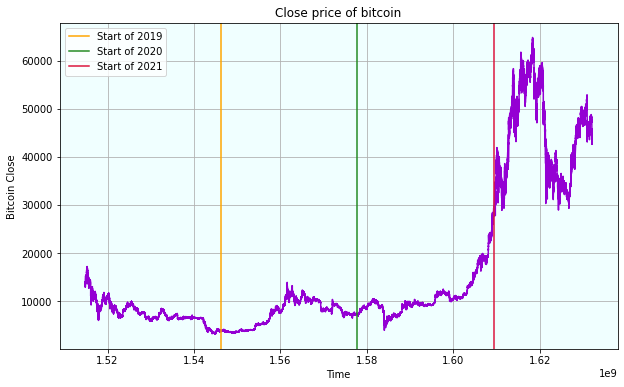

In [30]:
f = plt.figure(figsize = (10,6))

ax = f.add_subplot(111)
ax.set_facecolor('azure')
plt.plot(bit['Close'], c = 'darkviolet')
plt.axvline(x = 1546300800, label = 'Start of 2019', c = 'orange')
plt.axvline(x = 1577836800, label = 'Start of 2020', c = 'forestgreen')
plt.axvline(x = 1609459200, label = 'Start of 2021', c = 'crimson')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')
plt.grid()
plt.title('Close price of bitcoin')

plt.show()


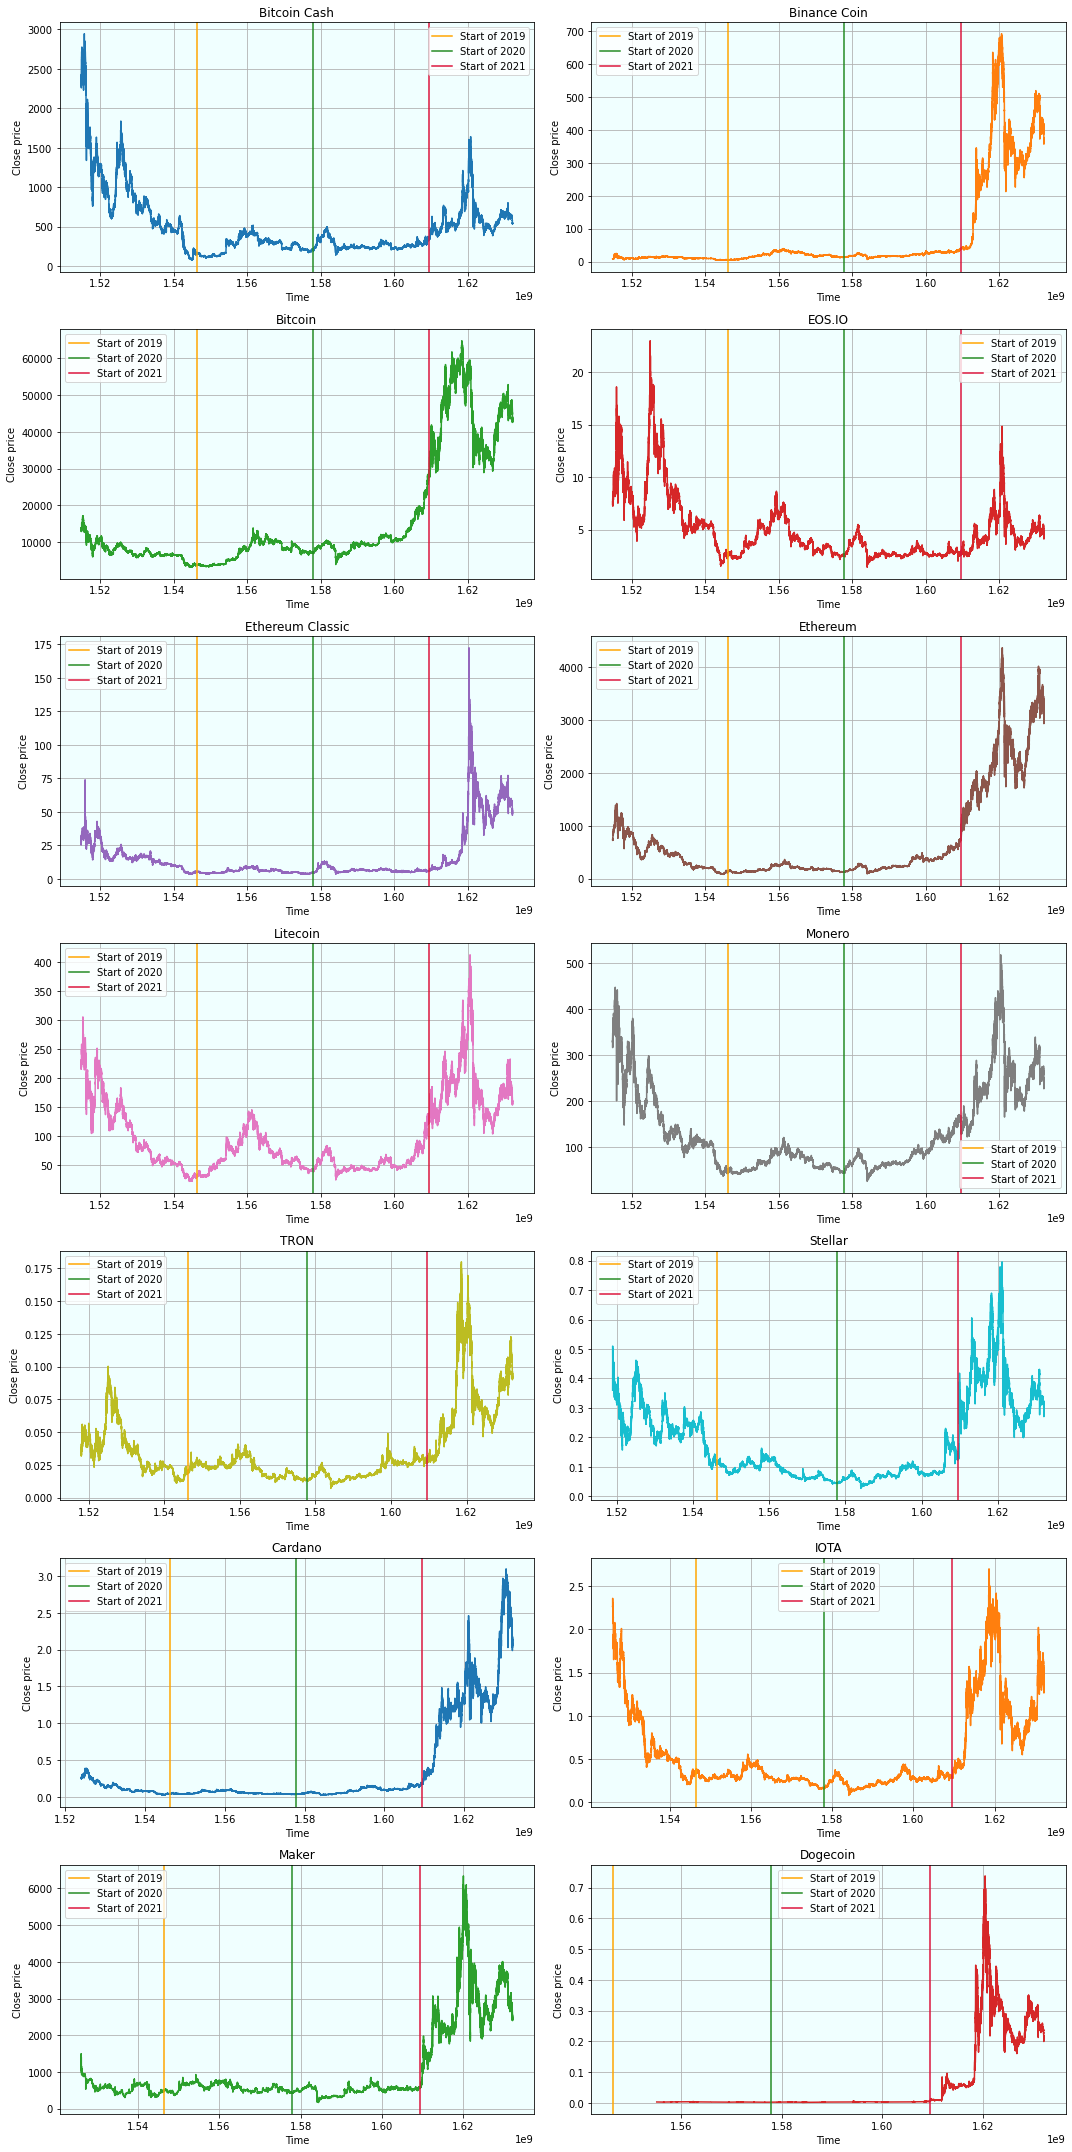

In [34]:
f = plt.figure(figsize = (15,30))

for ind,coin in enumerate(assets.Asset_Name.values):
    crypto = train[train.asset_name == coin].set_index('timestamp')
    ax = f.add_subplot(7,2,ind+1)
    ax.set_facecolor('azure')
    plt.plot(crypto['Close'], c = cmap[ind%10])
    plt.axvline(x = 1546300800, label = 'Start of 2019', c = 'orange')
    plt.axvline(x = 1577836800, label = 'Start of 2020', c = 'forestgreen')
    plt.axvline(x = 1609459200, label = 'Start of 2021', c = 'crimson')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Close price')
    plt.grid()
    plt.title(coin)
    
plt.tight_layout()
plt.show()